In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv('Automobiles-Data1.csv')
test_cars = pd.read_csv('Automobiles-Testing1.csv')
#test_cars.head(5)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [40]:
ordinal_values_cols = ['normalized-losses', 'wheel-base', 'make','length', 'width', 'height','curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
test_ordinal_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
car_features = cars[ordinal_values_cols]
test_car_features = test_cars[test_ordinal_values_cols]
test_car_features.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,103,104.3,188.8,67.2,56.2,2912,3.78,3.15,9.5,114,5400,23,28
1,74,104.3,188.8,67.2,57.5,3034,3.78,3.15,9.5,114,5400,23,28
2,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28
3,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25
4,95,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27


In [41]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
car_features['make'] = lb_make.fit_transform(car_features['make'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
car_features['make'].head(11)


0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     2
9     2
10    2
Name: make, dtype: int64

In [46]:
#Replace all ? values with NaN values
car_features.replace('?', np.nan, inplace=True)
test_car_features.replace('?', np.nan, inplace=True)
#Make sure all values are type float
car_features = car_features.astype(float)
test_car_features = test_car_features.astype(float)
car_features.shape[0]
#test_car_features.shape[0]
test_car_features.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,103.0,104.3,188.8,67.2,56.2,2912.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
1,74.0,104.3,188.8,67.2,57.5,3034.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
2,95.0,109.1,188.8,68.9,55.5,2952.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
3,95.0,109.1,188.8,68.8,55.5,3049.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0
4,95.0,109.1,188.8,68.9,55.5,3217.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0


In [47]:
car_features = car_features.dropna(subset=['price'])
test_car_features.isnull().sum()
car_features.isnull().sum()

normalized-losses    33
wheel-base            0
make                  0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [48]:
car_features = car_features.fillna(car_features.mean())

test_car_features = test_car_features.fillna(test_car_features.mean())
test_car_features.isnull().sum()
car_features.isnull().sum()
#With those rows disposed off, I will replace any remaining null values with the mean value of their respective column.

normalized-losses    0
wheel-base           0
make                 0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [49]:
car_features.head(5)


,normalized-losses,wheel-base,make,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.685714,88.6,0.0,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.685714,88.6,0.0,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.685714,94.5,0.0,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.000000,99.8,1.0,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.000000,99.4,1.0,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [59]:
car_features.to_csv('car_features.csv')
test_car_features.to_csv('test_car_features.csv')

In [3]:
import seaborn as sns
%matplotlib inline

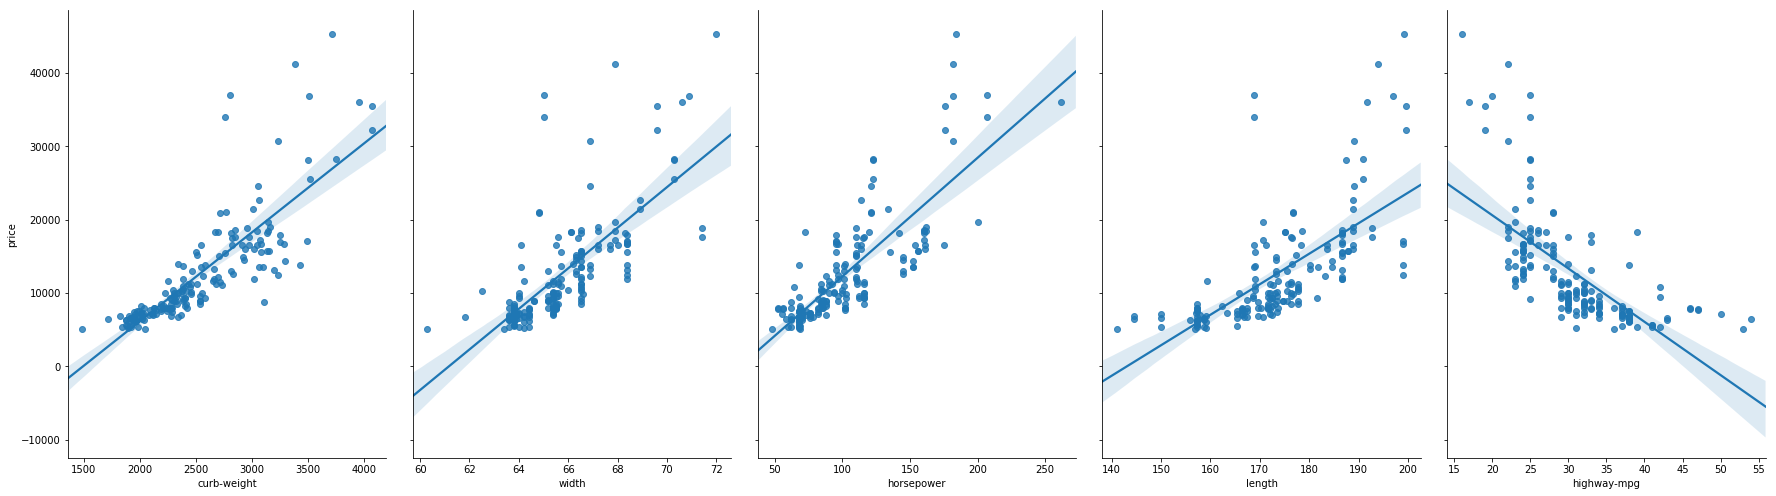

In [53]:
sns.pairplot(car_features, x_vars=['curb-weight','width','horsepower','length','highway-mpg'], y_vars='price', size=7, aspect=0.7, kind='reg')

In [13]:
feature_cols=['curb-weight','width','horsepower']
X = car_features[feature_cols]
y = car_features['price']

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(129, 3)
(129,)
(44, 3)
(44,)


In [16]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print(linreg.intercept_)
print(linreg.coef_)
list(zip(feature_cols, linreg.coef_))

-108978.484441
[ 1673.72602578   114.03903446]


[('width', 1673.7260257767114), ('horsepower', 114.03903446298783)]

In [19]:
y_pred = linreg.predict(X_test)


In [21]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3870.70122457


In [58]:
feature_cols = ['horsepower','curb-weight']

# use the list to select a subset of the original DataFrame
X = car_features[feature_cols]

# select a Series from the DataFrame
y = car_features.price

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3571.17653424


In [68]:
predictions = linreg.predict(test_car_features[feature_cols])
test_car_features['price'] = predictions
test_car_features.to_csv('linear_out.csv')

In [61]:
# #############################################################################
# Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.779576


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.779575


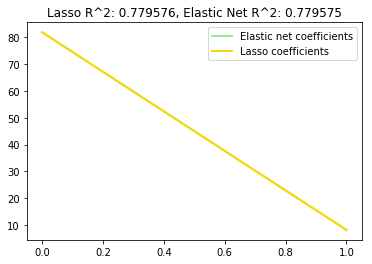

In [64]:
# #############################################################################
# ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()